# Jupyter Notebook Example

Credit: This is slightly modified from examples used in the FSCI 2017 Computational Reproducibility Day (https://osf.io/sbnz7/), which was created by Courtney Soderberg and Jennifer Smith from the Center for Open Science. 


# Setting up the notebook

## Lets get started

The notebook is built up from separate editable areas, or cells.

A new notebook contains a single *code* cell.

Add a line of code and execute it by:
* *clicking the run button*, or
* click in the cell, and press shift-return

In [1]:
print('hello world')

hello world


## Navigating and Selecting Cells

To select a cell, click on it. The selected cell will be surrounded by a box with the left hand side highlighted.

Move the selection focus to the cell above/below using the keyboard up/down arrow keys.

Additionally select adjacent cells using SHIFT-UP ARROW or SHIFT-DOWN ARROW.

## Managing Cells - Add, Delete, Reorder

Add a new cell to the notebook by:
* click the + button on the toolbar
* Insert -> Insert Cell Above or ESC-A
* Insert -> Insert Cell Below or ESC-B

Delete a cell by selecting it and:
* click the scissors button on the toolbar
* Edit -> Delete cells or ESC-X

Undelete the last deleted cell:
* Edit -> Undo Delete cells or ESC-Z

Each cell has a cell history associated with it. Use CMD-Z to step back through previous cell contents.

Reorder cells by:
* moving them up and down the notebook using the up and down arrows on the toolbar
* Edit -> Move Cell Up or Edit -> Move Cell Down
* cutting and pasting them:
    * Edit - >Cut or Edit->Paste Cells Above or Edit->Paste Cells Below on the toolbar

You can also copy selected cells from the toolbar, Edit -> Copy Cells or ESC-C.

## About Libraries in Python

Lets use our first code cell to import a library. A library in Python contains a set of tools (called functions) that perform tasks on our data. Importing a library is like getting a piece of lab equipment out of a storage locker and setting it up on the bench for use in a project. Once a library is imported, it can be used or called to perform many tasks.

Python doesn’t load all of the libraries available to it by default. We have to add an import statement to our code in order to use library functions. To import a library, we use the syntax `import libraryName`. If we want to give the library a nickname to shorten the command, we can add `as nickNameHere`. An example of importing the Pandas library using the common nickname `pd` is below.

**`import`** `pandas` **`as`** `pd`

## The Pandas Library

One of the best options for working with tabular data in Python is the Python Data Analysis Library (a.k.a. Pandas). The Pandas library is built on top of the NumPy package (another Python library). Pandas provides data structures, produces high quality plots with matplotlib, and integrates nicely with other libraries that use NumPy arrays. Those familiar with spreadsheets should become comfortable with Pandas data structures.
  

In [2]:
import pandas as pd
import numpy as np

Each time we call a function that’s in a library, we use the syntax `LibraryName.FunctionName`. Adding the library name with a `.` before the function name tells Python where to find the function. In the example above, we have imported Pandas as `pd`. This means we don’t have to type out `pandas` each time we call a Pandas function.

See this free [Pandas cheat sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet) from DataCamp for the most common Pandas commands. 

## Markdown

We're seen how we can have coding cells and show their output below them, but what about that plain language I mentioned? We can added another type of cell, a Markdown cell that contains narrative text. Markdown is a popular markup language that is a superset of HTML. To learn more, see [Jupyter's Markdown guide](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) or revisit the [Reproducible Research lesson on Markdown](https://github.com/Reproducible-Science-Curriculum/introduction-RR-Jupyter/blob/master/notebooks/Navigating%20the%20notebook%20-%20instructor%20script.ipynb).

Lets add a markdown cell above our library imports. Do to this:

* Change the cell type using the drop down list in the toolbar, or by using the ESC-M keyboard shortcut.
* To "open" or select a markdown cell for editing, double click the cell.
* View the rendered markdown by running the cell:

Markdown cells can contain:

* headings
    Prefix a line of text in a markdown cell by one or more # signs, followed by a space, to specify the level of the heading required.
# Heading 1
## Heading 2
...
###### Heading 6

# Getting data into the notebook

We will begin by locating and reading our data which are in a table format as a tab-delimited file. We will use Pandas’ `read_csv` function to pull the file directly into a `DataFrame`.

## What’s a `DataFrame`?
A `DataFrame` is a 2-dimensional data structure that can store in columns data of different types (including characters, integers, floating point values, factors and more). It is similar to a spreadsheet or a SQL table or data.frame in R. A `DataFrame` always has an index (0-based). An index refers to the position of an element in the data structure.

Note that we use `pd.read_csv`, not just `read_csv` or `pandas.read_csv`, because we imported Pandas as `pd`.

In our original file, the columns in the data set are separated by a TAB. We need to tell the `read_csv` function in Pandas that that is the delimiter with `sep = ‘\t’`.



In [3]:
url = "https://raw.githubusercontent.com/csoderberg/test_study/master/gapminder_copy.txt"
#You can also read your table in from a file directory
gapminder = pd.read_csv(url, sep = "\t")

The first thing to do when loading data into the notebook is to actually "look" at it.  How many rows and columns are there?  What types of variables are in it and what values can they take?

There are usually too many rows to print to the screen.  By default, when you type the name of the `DataFrame` and run a cell, Pandas knows to not print the whole thing.  Instead, you will see the first and last few rows with dots in between.  A neater way to see a preview of the dataset is the `head()` method.  Calling `dataset.head()` will display the first 5 rows of the data.  You can specify how many rows you want to see as an argument, like `dataset.head(10)`.  The `tail()` method does the same with the last rows of the `DataFrame`.

In [4]:
gapminder.head()

,year,pop,lifeexp,gdppercap,country,continent
0,1952.0,8425333.0,28.801,779.445314,afghanistan,asia
1,1957.0,9240934.0,30.332,820.853030,afghanistan,asia
2,1962.0,10267083.0,31.997,853.100710,afghanistan,asia
3,1962.0,NaN,31.997,NaN,afghanistan,asia
4,1967.0,11537966.0,34.020,836.197138,afghanistan,asia


Sometimes the table has too many columns to print on screen. Calling `df.columns.values` will print all the column names in an array.

In [5]:
gapminder.columns.values

array(['year', 'pop', 'lifeexp', 'gdppercap', 'country', 'continent'],
      dtype=object)

# Assess the structure and cleanliness


## How many rows and columns are in the data?
We often want to know how many rows and columns are in the data -- what is the "shape" of the `DataFrame`. Shape is an attribute of the `DataFrame`. Pandas has a convenient way for getting that information by using `DataFrame.shape`  (using `DataFrame` here as a generic name for your `DataFrame`). This returns a tuple (immutable values separated by commas) representing the dimensions of the `DataFrame` (rows, columns).<p>
To get the shape of the gapminder `DataFrame`:

In [6]:
gapminder.shape

(1712, 6)

We can learn even more about our `DataFrame`. The `info()` method gives a few useful pieces of information, including the shape of the `DataFrame`, the variable type of each column, and the amount of memory stored.

The output from `info()` displayed below shows that the fields ‘year’ and ‘pop’ (population) are represented as ‘float’ (that is: numbers with a decimal point). This is not appropriate: year and population should be integers or whole numbers. We can change the data-type with the function `astype()`. The code for `astype()` is shown below; however, we will change the data types later in this lesson.

In [7]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 6 columns):
year         1709 non-null float64
pop          1707 non-null float64
lifeexp      1711 non-null float64
gdppercap    1710 non-null float64
country      1712 non-null object
continent    1712 non-null object
dtypes: float64(4), object(2)
memory usage: 80.3+ KB


The `describe()` method will take the numeric columns and provide a summary of their values. This is useful for getting a sense of the ranges of values and seeing if there are any unusual or suspicious numbers.


In [8]:
gapminder.describe()

,year,pop,lifeexp,gdppercap
count,1709.000000,1.707000e+03,1711.000000,1710.000000
mean,1979.472206,2.960800e+07,59.457335,7212.354605
std,17.251581,1.060681e+08,12.921363,9843.860602
min,1952.000000,6.001100e+04,23.599000,241.165876
25%,1967.000000,2.797182e+06,48.185000,1206.269577
50%,1977.000000,7.026113e+06,60.660000,3534.772106
75%,1992.000000,1.968417e+07,70.840500,9322.285886
max,2007.000000,1.318683e+09,82.603000,113523.132900


The `DataFrame` function `describe()` just blindly looks at all numeric variables. We wouldn't actually want to take the mean year. Additionally, we obtain ‘NaN’ values for our quartiles. This suggests we might have missing data which we can (and will) deal with shortly when we begin to clean our data.

For now, let's pull out only the columns that are truly continuous numbers (i.e. ignore the description for ‘year’). This is a preview of selecting columns from the data; we'll talk more about how to do it later in the lesson.

In [9]:
gapminder[['pop', 'lifeexp', 'gdppercap']].describe()

,pop,lifeexp,gdppercap
count,1.707000e+03,1711.000000,1710.000000
mean,2.960800e+07,59.457335,7212.354605
std,1.060681e+08,12.921363,9843.860602
min,6.001100e+04,23.599000,241.165876
25%,2.797182e+06,48.185000,1206.269577
50%,7.026113e+06,60.660000,3534.772106
75%,1.968417e+07,70.840500,9322.285886
max,1.318683e+09,82.603000,113523.132900


# Data cleaning

## Referencing objects vs copying objects
Before we get started with cleaning our data, let's practice good data hygiene by first creating a copy of our original data set. Often, you want to leave the original data untouched.  To protect your original, you can make a copy of your data (and save it to a new `DataFrame` variable) before operating on the data or a subset of the data.  This will ensure that a new version of the original data is created and your original is preserved.

###### Why this is important
Suppose you take a subset of your `DataFrame` and store it in a new variable, like `gapminder_early = gapminder[gapminder['year'] < 1970]`.  Doing this does not actually create a new object. Instead, you have just given a name to that subset of the original data: `gapminder_early`. This subset still points to the original rows of `gapminder`.  Any changes you make to the new `DataFrame` `gapminder_early` will appear in the corresponding rows of your original `gapminder` `DataFrame` too.  


In [10]:
gapminder = pd.read_csv(url, sep = "\t")
gapminder_copy = gapminder.copy()
gapminder_copy.head()

,year,pop,lifeexp,gdppercap,country,continent
0,1952.0,8425333.0,28.801,779.445314,afghanistan,asia
1,1957.0,9240934.0,30.332,820.853030,afghanistan,asia
2,1962.0,10267083.0,31.997,853.100710,afghanistan,asia
3,1962.0,NaN,31.997,NaN,afghanistan,asia
4,1967.0,11537966.0,34.020,836.197138,afghanistan,asia


## Handling Missing Data

Missing data (often denoted as 'NaN'- not a number- in Pandas, or as 'null') is an important issue to handle because Pandas cannot compute on rows or columns with missing data. 'NaN' or 'null' does not mean the value at that position is zero, it means that there is no information at that position. Ignoring missing data doesn't make it go away. There are different ways of dealing with it which include:

* analyzing only the available data (i.e. ignore the missing data)
* input the missing data with replacement values and treating these as though they were observed
* input the missing data and account for the fact that these were inputed with uncertainty (ex: create a new boolean variable so you know that these values were not actually observed)
* use statistical models to allow for missing data--make assumptions about their relationships with the available data as necessary

For our purposes with the dirty gapminder data set, we know our missing data is excess (and unnecessary) and we are going to choose to analyze only the available data. To do this, we will simply remove rows with missing values.

This is incredibly easy to do because Pandas allows you to either remove all instances with null data or replace them with a particular value.

`df = df.dropna()` drops rows with any column having NA/null data.  `df = df.fillna(value)` replaces all NA/null data with the argument `value`.

For more fine-grained control of which rows (or columns) to drop, you can use `how` or `thresh`. These are more advanced topics and are not covered in this lesson; you are encouraged to explore them on your own.

In [11]:
gapminder_copy = gapminder_copy.dropna()
gapminder_copy.head()

,year,pop,lifeexp,gdppercap,country,continent
0,1952.0,8425333.0,28.801,779.445314,afghanistan,asia
1,1957.0,9240934.0,30.332,820.853030,afghanistan,asia
2,1962.0,10267083.0,31.997,853.100710,afghanistan,asia
4,1967.0,11537966.0,34.020,836.197138,afghanistan,asia
5,1972.0,13079460.0,36.088,739.981106,afghanistan,asia


## Changing Data Types
We can change the data-type with the function `astype()`. The code for `astype()` is shown below.

## Subsetting

We can subset (or slice) by giving the numbers of the rows you want to see between square brackets.

*REMINDER:* Python uses 0-based indexing. This means that the first element in an object is located at position 0. this is different from other tools like R and Matlab that index elements within objects starting at 1.

In [12]:
gapminder_copy[0:15]

,year,pop,lifeexp,gdppercap,country,continent
0,1952.0,8425333.0,28.801,779.445314,afghanistan,asia
1,1957.0,9240934.0,30.332,820.853030,afghanistan,asia
2,1962.0,10267083.0,31.997,853.100710,afghanistan,asia
4,1967.0,11537966.0,34.020,836.197138,afghanistan,asia
5,1972.0,13079460.0,36.088,739.981106,afghanistan,asia
6,1977.0,14880372.0,38.438,786.113360,afghanistan,asia
7,1982.0,12881816.0,39.854,978.011439,afghanistan,asia
8,1987.0,13867957.0,40.822,852.395945,afghanistan,asia
9,1992.0,16317921.0,41.674,649.341395,afghanistan,asia
10,1997.0,22227415.0,41.763,635.341351,afghanistan,asia


In [13]:
#Select the first 15 rows
gapminder_copy[:15]

,year,pop,lifeexp,gdppercap,country,continent
0,1952.0,8425333.0,28.801,779.445314,afghanistan,asia
1,1957.0,9240934.0,30.332,820.853030,afghanistan,asia
2,1962.0,10267083.0,31.997,853.100710,afghanistan,asia
4,1967.0,11537966.0,34.020,836.197138,afghanistan,asia
5,1972.0,13079460.0,36.088,739.981106,afghanistan,asia
6,1977.0,14880372.0,38.438,786.113360,afghanistan,asia
7,1982.0,12881816.0,39.854,978.011439,afghanistan,asia
8,1987.0,13867957.0,40.822,852.395945,afghanistan,asia
9,1992.0,16317921.0,41.674,649.341395,afghanistan,asia
10,1997.0,22227415.0,41.763,635.341351,afghanistan,asia


In [14]:
#Select the last 10 rows
gapminder_copy[-10:]

,year,pop,lifeexp,gdppercap,country,continent
1702,1962.0,4277736.0,52.358,527.272182,zimbabwe,africa
1703,1967.0,4995432.0,53.995,569.795071,zimbabwe,africa
1704,1972.0,5861135.0,55.635,799.362176,zimbabwe,africa
1705,1977.0,6642107.0,57.674,685.587682,zimbabwe,africa
1706,1982.0,7636524.0,60.363,788.855041,zimbabwe,africa
1707,1987.0,9216418.0,62.351,706.157306,zimbabwe,africa
1708,1992.0,10704340.0,60.377,693.420786,zimbabwe,africa
1709,1997.0,11404948.0,46.809,792.449960,zimbabwe,africa
1710,2002.0,11926563.0,39.989,672.038623,zimbabwe,africa
1711,2007.0,12311143.0,43.487,469.709298,zimbabwe,africa


Subsetting can also be done by selecting for a particular column or for a particular value in a column; for instance select the rows that have ‘africa’ in the column ‘continent. Note the double equal sign: single equal signs are used in Python to assign something to a variable. The double equal sign is a comparison: the variable to the left has to be exactly equal to the string to the right.

In [15]:
#Select for a particular column
gapminder_copy['year']

#this syntax, calling the column as an attribute, gives you the same output
gapminder_copy.year

0       1952.0
1       1957.0
2       1962.0
4       1967.0
5       1972.0
6       1977.0
7       1982.0
8       1987.0
9       1992.0
10      1997.0
11      2002.0
12      2007.0
13      1952.0
14      1957.0
15      1962.0
16      1967.0
17      1972.0
18      1977.0
19      1982.0
20      1987.0
21      1992.0
22      1997.0
23      2002.0
24      2007.0
25      1952.0
26      1957.0
27      1962.0
28      1967.0
29      1972.0
31      1977.0
         ...  
1682    1982.0
1683    1987.0
1684    1992.0
1685    1997.0
1686    2002.0
1687    2007.0
1688    1952.0
1689    1957.0
1690    1962.0
1691    1967.0
1692    1972.0
1693    1977.0
1694    1982.0
1695    1987.0
1696    1992.0
1697    1997.0
1698    2002.0
1699    2007.0
1700    1952.0
1701    1957.0
1702    1962.0
1703    1967.0
1704    1972.0
1705    1977.0
1706    1982.0
1707    1987.0
1708    1992.0
1709    1997.0
1710    2002.0
1711    2007.0
Name: year, Length: 1704, dtype: float64

## Summarize and plot

Summaries (but can’t *say* statistics…)
* Sort data
* Can make note about using numpy functions, dif between `DataFrame` and `array`
Good Plots for the data/variable type



Plots 
* of subsets, 
* single variables
* pairs of variables
* Matplotlib syntax (w/ Seaborn for defaults (prettier, package also good for more analysis later...))

Exploring is often iterative - summarize, plot, summarize, plot, etc. - sometimes it branches…


# Summarizing data

Remember that the `info()` method gives a few useful pieces of information, including the shape of the `DataFrame`, the variable type of each column, and the amount of memory stored. We can see many of our changes (continent and country columns instead of region, higher number of rows, etc.) reflected in the output of the `info()` method.

In [16]:
gapminder_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1711
Data columns (total 6 columns):
year         1704 non-null float64
pop          1704 non-null float64
lifeexp      1704 non-null float64
gdppercap    1704 non-null float64
country      1704 non-null object
continent    1704 non-null object
dtypes: float64(4), object(2)
memory usage: 173.2+ KB


We also saw above that the `describe()` method will take the numeric columns and give a summary of their values. We have to remember that we changed the column names and this time it shouldn't have NaNs.

In [17]:
gapminder_copy[['pop', 'lifeexp', 'gdppercap']].describe()

,pop,lifeexp,gdppercap
count,1.704000e+03,1704.000000,1704.000000
mean,2.960121e+07,59.474439,7215.327081
std,1.061579e+08,12.917107,9857.454543
min,6.001100e+04,23.599000,241.165876
25%,2.793664e+06,48.198000,1202.060309
50%,7.023596e+06,60.712500,3531.846989
75%,1.958522e+07,70.845500,9325.462346
max,1.318683e+09,82.603000,113523.132900


### More summaries

What if we just want a single value, like the mean of the population? We can call mean on a single column this way:


In [18]:
gapminder_copy['pop'].mean()

29601212.32511736

What if we want to know the mean population by _continent_? Then we need to use the Pandas `groupby()` method and tell it which column we want to group by.


In [19]:
gapminder_copy[['continent', 'pop']].groupby(by='continent').mean()

,pop
continent,
africa,9.916003e+06
americas,2.450479e+07
asia,7.703872e+07
europe,1.716976e+07
oceania,8.874672e+06


What if we wanted a new `DataFrame` that just contained these summaries? This could be a table in a report, for example.

In [20]:
continent_mean_pop = gapminder_copy[['continent', 'pop']].groupby(by='continent').mean()
continent_mean_pop = continent_mean_pop.rename(columns = {'pop':'meanpop'})
continent_row_ct = gapminder_copy[['continent', 'country']].groupby(by='continent').count()
continent_row_ct = continent_row_ct.rename(columns = {'country':'nrows'})
continent_median_pop = gapminder_copy[['continent', 'pop']].groupby(by='continent').median()
continent_median_pop = continent_median_pop.rename(columns = {'pop':'medianpop'})
gapminder_summs = pd.concat([continent_row_ct,continent_mean_pop,continent_median_pop], axis=1)
gapminder_summs = gapminder_summs.rename(columns = {'y':'year'})
gapminder_summs

,nrows,meanpop,medianpop
continent,,,
africa,624,9.916003e+06,4579311.0
americas,300,2.450479e+07,6227510.0
asia,396,7.703872e+07,14530830.5
europe,360,1.716976e+07,8551125.0
oceania,24,8.874672e+06,6403491.5


## Visualization with `matplotlib`

[matplotlib](http://matplotlib.org) is Python's main visualization 
library. It provides a range of tools for constructing plots and numerous 
high-level plotting libraries (e.g., [Seaborn](http://seaborn.pydata.org)) are 
built with matplotlib in mind. When we were in the early stages of setting up 
our analysis, we loaded these libraries like so:

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

*Consider the above three commands to be essential practice for plotting (as
essential as **`import`** `pandas` **`as`** `pd` is for data munging).*

Now, let's turn to data visualization. In order to get a feel for the properties
of the data set we are working with, data visualization is key. While, we will
focus only on the essentials of how to properly construct plots in univariate
and bivariate settings here, it's worth noting that both matplotlib and Seaborn
support a diversity of plots: [matplotlib 
gallery](http://matplotlib.org/gallery.html), [Seaborn
gallery](http://seaborn.pydata.org/examples/). 


---

### Single variables

* __Histograms__ - provide a quick way of visualizing the distribution of numerical
  data, or the frequencies of observations for categorical variables.

Text(0,0.5,'count')

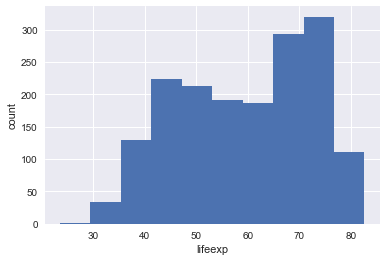

In [22]:
#import numpy as npa
plt.hist(gapminder_copy['lifeexp'])
plt.xlabel('lifeexp')
plt.ylabel('count')

* __Boxplots__ - provide a way of comparing the summary measures (e.g., max, min,
  quartiles) across variables in a data set. Boxplots can be particularly useful with larger data sets.

---

Text(0,0.5,'lifeexp')

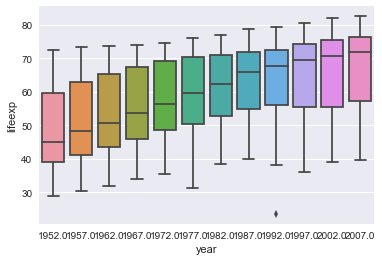

In [23]:
sns.boxplot(x='year', y='lifeexp', data = gapminder_copy)
plt.xlabel('year')
plt.ylabel('lifeexp')

### Pairs of variables

* __Scatterplots__ - visualization of relationships across two variables...

Text(0,0.5,'lifeexp')

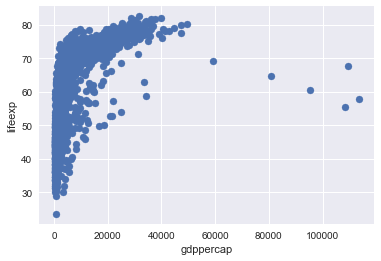

In [24]:
# example plot goes here

plt.scatter(gapminder_copy['gdppercap'], gapminder_copy['lifeexp'])
plt.xlabel('gdppercap')
plt.ylabel('lifeexp')

Text(0,0.5,'lifeexp')

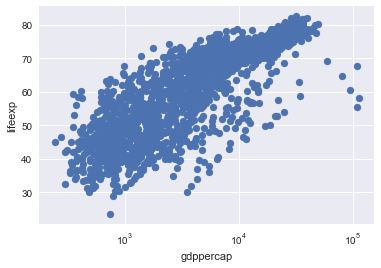

In [25]:
plt.scatter(gapminder_copy['gdppercap'], gapminder_copy['lifeexp'])
plt.xscale('log')
plt.xlabel('gdppercap')
plt.ylabel('lifeexp')

### Saving your plots as image files  
If you'd like to save your plots as an image file, you can run `fig.savefig('my_figure.png')` where `"my_figure"` is the file name.    

# Putting it all together

On your own or with a partner, using the techniques you've learned in this lesson, try to create a plot of life expectancy in Canada during the 1950s and 1960s. We've provided headers to guide you through the process.

#### Import your data

#### Describe your data set here using *Markdown*
What is the general shape of your `DataFrame`? What are the datatypes? Are there missing values? What questions do you have about your data set and how will you answer those questions?

Answers:

#### Create a subset of the data for just Canada and for years between 1950 and 1969

#### Create a plot of life expectancy by year. Is there anything wrong?

#### Fix the 99999 coding error, rerun the plot and save it. *Hint* try using the df.set_values() command to change the value